# Introduction

Fun with Lego!

**Data Source**

[Rebrickable](https://rebrickable.com/downloads/) has compiled data on all the LEGO pieces in existence.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Data Exploration

In [2]:
colors = pd.read_csv('data/colors.csv')
colors.sample(5)

,id,name,rgb,is_trans
63,80,Metallic Silver,A5A9B4,f
138,1012,Fabuland Orange,EF9121,f
22,22,Purple,81007B,f
2,1,Blue,0055BF,f
54,71,Light Bluish Gray,A0A5A9,f


In [3]:
# no. of unqite names

colors['name'].nunique()

189

In [4]:
# transparent blocks
# see info https://rebrickable.com/downloads/

colors.groupby('is_trans').count()

,id,name,rgb
is_trans,,,
f,151,151,151
t,38,38,38


In [5]:
colors.is_trans.value_counts()

f    151
t     38
Name: is_trans, dtype: int64

### Understanding LEGO Themes vs. LEGO Sets

The <code>sets.csv</code> data contains a list of sets over the years and the number of parts that each of these sets contains.

In [6]:
sets = pd.read_csv('data/sets.csv')
sets.head()

,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1979,67,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


In [7]:
sets.tail()

,set_num,name,year,theme_id,num_parts
17922,XWING-1,Mini X-Wing Fighter,2019,158,60
17923,XWING-2,X-Wing Trench Run,2019,158,52
17924,YODACHRON-1,Yoda Chronicles Promotional Set,2013,158,413
17925,YTERRIER-1,Yorkshire Terrier,2018,598,0
17926,ZX8000-1,ZX 8000 LEGO Sneaker,2020,501,0


In [8]:
sets.sort_values('year').head()

,set_num,name,year,theme_id,num_parts
10726,700.A-1,Small Brick Set (ABB),1949,371,24
10721,700.3-1,Medium Gift Set (ABB),1949,365,142
10703,700.1-1,Extra-Large Gift Set (ABB),1949,365,142
10716,700.2-1,Large Gift Set (ABB),1949,365,178
10727,700.B-1,Small Doors and Windows Set (ABB),1949,371,12


In [9]:
# have a look at a certain year, e.g. 1949

sets[sets['year'] == 1949]

,set_num,name,year,theme_id,num_parts
10703,700.1-1,Extra-Large Gift Set (ABB),1949,365,142
10716,700.2-1,Large Gift Set (ABB),1949,365,178
10721,700.3-1,Medium Gift Set (ABB),1949,365,142
10726,700.A-1,Small Brick Set (ABB),1949,371,24
10727,700.B-1,Small Doors and Windows Set (ABB),1949,371,12


In [10]:
# sort by no. of parts

sets.sort_values('num_parts', ascending=False).head()

,set_num,name,year,theme_id,num_parts
3774,31203-1,World Map,2021,709,11695
17053,BIGBOX-1,The Ultimate Battle for Chima,2015,571,9987
319,10276-1,Colosseum,2020,673,9036
12466,75192-1,UCS Millennium Falcon,2017,171,7541
11767,71043-1,Hogwarts Castle,2018,246,6020


In [11]:
sets_by_year = sets.groupby('year').count()
sets_by_year['set_num'].head()

year
1949     5
1950     6
1953     4
1954    14
1955    28
Name: set_num, dtype: int64

In [12]:
sets_by_year['set_num'].tail()

year
2017    848
2018    845
2019    885
2020    887
2021    727
Name: set_num, dtype: int64

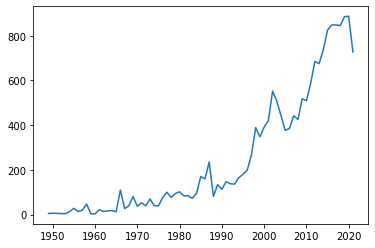

In [13]:
plt.plot(sets_by_year.index, sets_by_year.set_num)

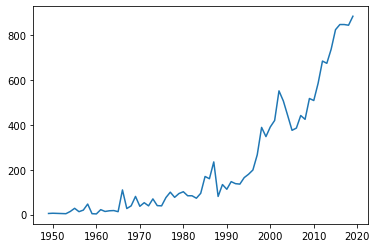

In [14]:
plt.plot(sets_by_year.index[:-2], sets_by_year.set_num[:-2])

### Aggregate Data with the Python .agg() Function

Work out the number of different themes shipped by year = count the number of unique theme_ids per calendar year

In [15]:
themes_by_year = sets.groupby('year').agg({'theme_id': pd.Series.nunique})

In [16]:
themes_by_year.rename(columns = {'theme_id':'nr_themes'}, inplace = True) 
themes_by_year.head()

,nr_themes
year,
1949,2
1950,1
1953,2
1954,2
1955,4


In [17]:
themes_by_year.tail()

,nr_themes
year,
2017,88
2018,94
2019,79
2020,87
2021,65


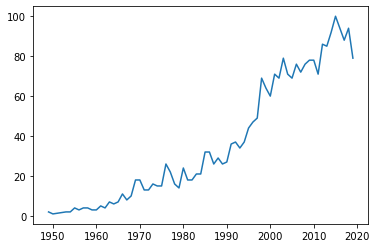

In [18]:
plt.plot(themes_by_year.index[:-2], themes_by_year.nr_themes[:-2])

### Line Charts with Two Seperate Axes

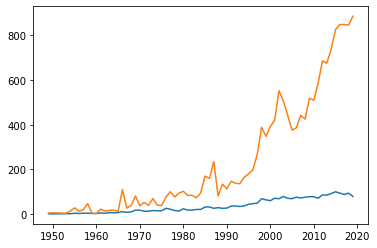

In [19]:
# 'quick and dirty' chart
plt.plot(themes_by_year.index[:-2], themes_by_year.nr_themes[:-2])
plt.plot(sets_by_year.index[:-2], sets_by_year.set_num[:-2])

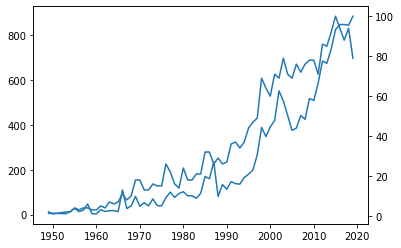

In [20]:
ax1 = plt.gca() # get the axis
ax2 = ax1.twinx() # create another axis that shares the same x-axis

ax1.plot(sets_by_year.index[:-2], sets_by_year.set_num[:-2])
ax2.plot(themes_by_year.index[:-2], themes_by_year.nr_themes[:-2])

Text(0, 0.5, 'No. of Themes')

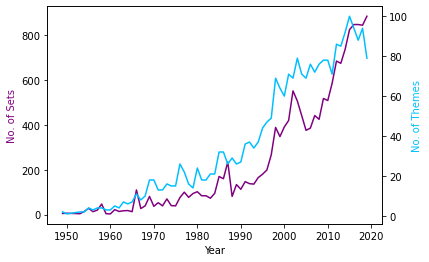

In [21]:
ax1 = plt.gca()
ax2 = ax1.twinx()

# add styling
ax1.plot(sets_by_year.index[:-2], sets_by_year.set_num[:-2], color='purple')
ax2.plot(themes_by_year.index[:-2], themes_by_year.nr_themes[:-2], 'deepskyblue')

ax1.set_xlabel('Year')
ax1.set_ylabel('No. of Sets', color='purple')
ax2.set_ylabel('No. of Themes', color='deepskyblue')

In [22]:
# have a look at the number of parts by year

parts_per_set = sets.groupby('year').agg({'num_parts': pd.Series.mean})
parts_per_set.head()

,num_parts
year,
1949,99.600000
1950,1.000000
1953,12.500000
1954,8.357143
1955,16.107143


In [23]:
parts_per_set.tail()

,num_parts
year,
2017,210.444575
2018,202.964497
2019,197.242938
2020,238.143179
2021,222.960110


### Scatter Plots in Matplotlib

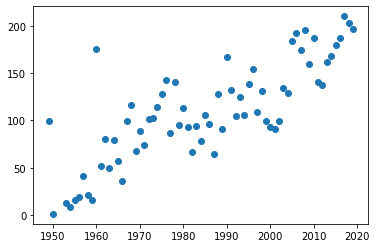

In [24]:
plt.scatter(parts_per_set.index[:-2], parts_per_set.num_parts[:-2])

### Number of Sets per LEGO Theme

In [25]:
set_theme_count = sets["theme_id"].value_counts()
set_theme_count[:5]

501    1767
158     787
503     566
494     452
67      412
Name: theme_id, dtype: int64

### Add Themes data

In [26]:
themes = pd.read_csv('data/themes.csv') # has the theme names!
themes.head()

,id,name,parent_id
0,1,Technic,NaN
1,2,Arctic Technic,1.0
2,3,Competition,1.0
3,4,Expert Builder,1.0
4,5,Model,1.0


In [27]:
themes[themes.name == 'Star Wars']

,id,name,parent_id
17,18,Star Wars,1.0
119,158,Star Wars,NaN
141,209,Star Wars,207.0
178,261,Star Wars,258.0


In [28]:
sets[sets.theme_id == 18]

,set_num,name,year,theme_id,num_parts
9938,65081-1,R2-D2 / C-3PO Droid Collectors Set,2002,18,1
13421,8000-1,Pit Droid,2000,18,223
13428,8001-1,Battle Droid,2000,18,336
13439,8002-1,Destroyer Droid,2000,18,567
13451,8007-1,C-3PO,2001,18,339
13452,8008-1,Stormtrooper,2001,18,361
13453,8009-1,R2-D2,2002,18,239
13454,8010-1,Darth Vader,2002,18,388
13463,8011-1,Jango Fett,2002,18,425
13465,8012-1,Super Battle Droid,2002,18,378


In [29]:
sets[sets.theme_id == 209]

,set_num,name,year,theme_id,num_parts
12296,75023-1,Star Wars Advent Calendar 2013,2013,209,254
12329,75056-1,Star Wars Advent Calendar 2014,2014,209,275
12363,75097-1,Star Wars Advent Calendar 2015,2015,209,291
12414,75146-1,Star Wars Advent Calendar 2016,2016,209,282
12456,75184-1,Star Wars Advent Calendar 2017,2017,209,309
12489,75213-1,Star Wars Advent Calendar 2018,2018,209,307
12528,75245-1,Star Wars Advent Calendar 2019,2019,209,280
12564,75279-1,Star Wars Advent Calendar 2020,2020,209,311
12590,75307-1,Star Wars Advent Calendar 2021,2021,209,0
13389,7958-1,Star Wars Advent Calendar 2011,2011,209,267


### Merging DataFrames


In [30]:
set_theme_count = pd.DataFrame({'id':set_theme_count.index, 
                                'set_count':set_theme_count.values})
set_theme_count.head()

,id,set_count
0,501,1767
1,158,787
2,503,566
3,494,452
4,67,412


In [31]:
merged_df = pd.merge(set_theme_count, themes, on='id')
merged_df[:3]

,id,set_count,name,parent_id
0,501,1767,Gear,NaN
1,158,787,Star Wars,NaN
2,503,566,Key Chain,501.0


<BarContainer object of 10 artists>

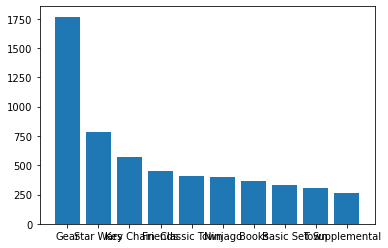

In [32]:
# basic barchart
plt.bar(merged_df.name[:10], merged_df.set_count[:10])

<BarContainer object of 10 artists>

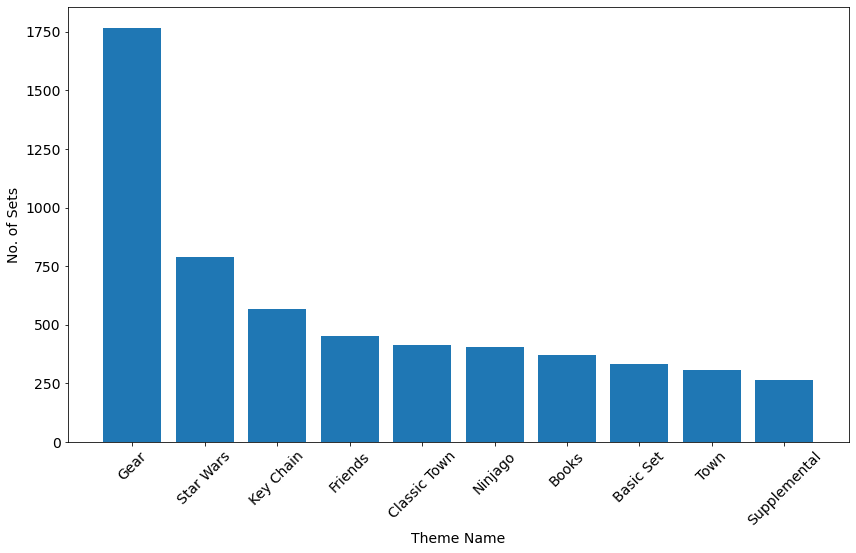

In [33]:
# style it

plt.figure(figsize=(14,8))
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.ylabel('No. of Sets', fontsize=14)
plt.xlabel('Theme Name', fontsize=14)

plt.bar(merged_df.name[:10], merged_df.set_count[:10])

